## **Salifort_Motors_Employee_Retention**

### Capstone Project from Google Advanced Data Analytics Professional Certification Course

## Description

This project is to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.
Here,We have analyzed the human resources data, which included variables such as monthly working hours,number of projects,department and salary.We performed EDA using Python packages and created 4 classification models such as Logistic Regression,Decision Tree,Random Forest and XGBoost.Then we evaluated the models using metrics such as accuracy,recall,precision,f1 score and confusion matrix.
Finally We summarized the results and presented the recommendations for Salifort's Human Resources team and Senior Leadership team with an Executive Summary. 

# **PACE stages**


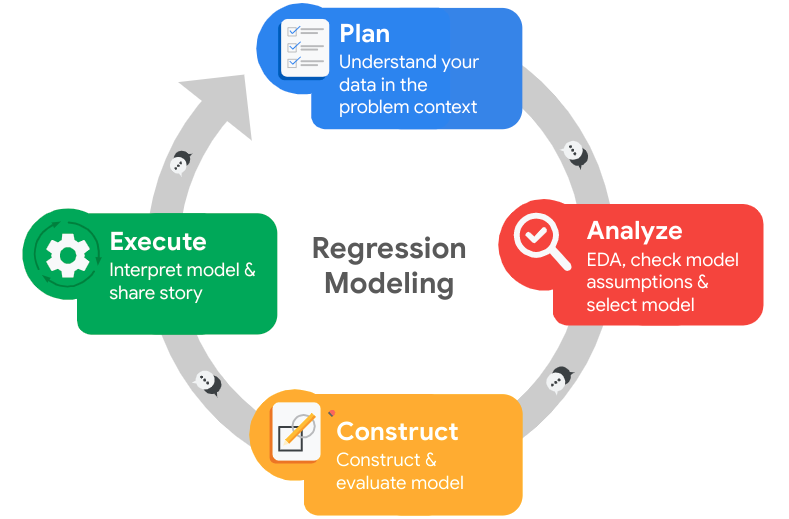

## **Pace: Plan**
In this stage, we will consider the following:

### Understanding the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to us and ask our team to provide data-driven suggestions based on our understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Our goal in this project is to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If we can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

#### Key Stakeholders:

* Senior Leadership team 
* Human Resources team

### About the HR dataset

The dataset that we'll be using for this project contains 14,999 rows and 10 columns for the variables listed below. 

Data source : [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [187]:
# Import packages
# Data Manipulation
import pandas as pd
import numpy as np
# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Data Modeling
from xgboost import XGBClassifier,XGBRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# Metrics
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,confusion_matrix,ConfusionMatrixDisplay,roc_curve,roc_auc_score,classification_report
from sklearn.tree import plot_tree
# Saving Models
import pickle
# For displaying all of the columns in dataframes
pd.set_option('display.max_columns',None)

### Load dataset

`Pandas` is used to read a dataset called **`HR_comma_sep.csv`.**

In [96]:
# Load dataset into a dataframe
df0 = pd.read_csv("/Users/shamilasaleem/Downloads/HR_comma_sep.csv")


# Display first 10 rows of the dataframe
df0.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand the variables
- Clean the dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [97]:
# Gather basic information about the data
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [98]:
# Gather descriptive statistics about the data
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step,we rename the columns as needed. Standardize the column names so that they are all in `snake_case`, and correct any column names that are misspelled, and make column names more concise as needed.

In [99]:
# Display all column names
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [100]:
# Rename columns as needed
df0 = df0.rename(columns = {'Work_accident':'work_accident',
                            'average_montly_hours':'average_monthly_hours',
                           'time_spend_company':'tenure',
                           'Department':'department'})

# Display all column names after the update
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [101]:
# Check for missing values
df0.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [102]:
# Check for duplicates
df0.duplicated().sum()

np.int64(3008)

In [103]:
# Inspect some rows containing duplicates as needed
df0[df0.duplicated()].head(10)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
1516,0.40,0.50,2,127,3,0,1,0,IT,low
1616,0.37,0.46,2,156,3,0,1,0,sales,low
1696,0.39,0.56,2,160,3,0,1,0,sales,low
1833,0.10,0.85,6,266,4,0,1,0,sales,low
12000,0.38,0.53,2,157,3,0,1,0,sales,low


In [142]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df1 = df0.drop_duplicates(keep = 'first')

# Display first few rows of new dataframe as needed
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

<Axes: xlabel='tenure'>

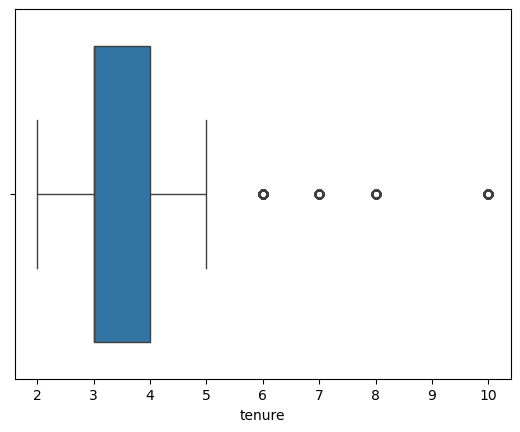

In [105]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
sns.boxplot(x = df1['tenure'])


Certain types of models are more sensitive to outliers than others. When we get to the stage of building our model, it is essential to take care of outliers, based on the type of model we decide to use.

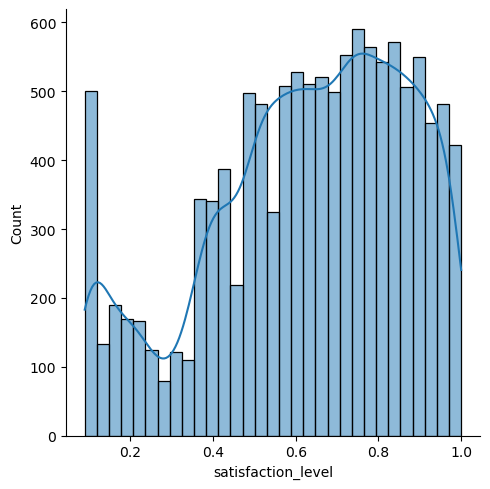

In [107]:
#Observing varaibles in our data
sns.displot(df1['satisfaction_level'],kde = True)

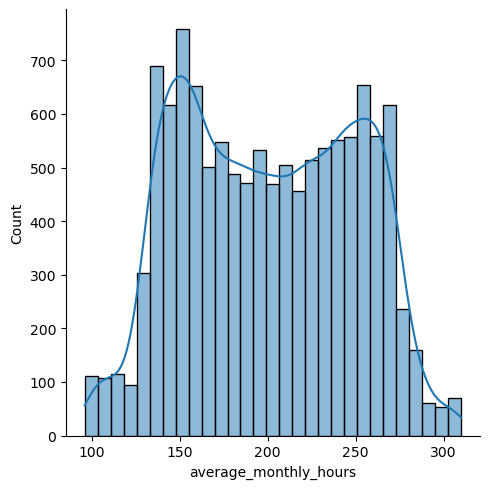

In [108]:
sns.displot(df1['average_monthly_hours'],kde= True)

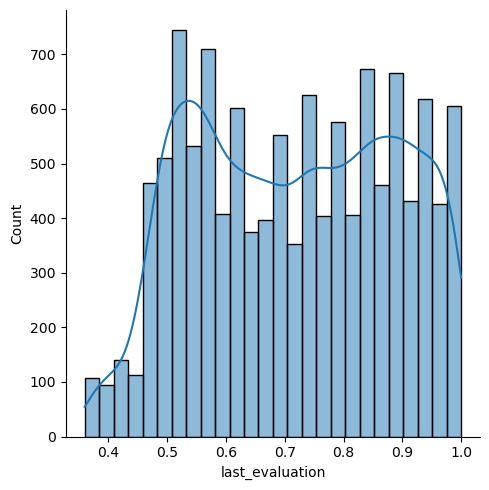

In [109]:
sns.displot(df1['last_evaluation'],kde = True)

The plots show that there is a huge number of employees who have a satisfaction level below 0.2. We can also see that more employees have a satisfaction level greater than 0.6. For the last evaluation and average monthly hours, it has two curved edges, which looks like the values are similiar among employees.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



* Some of the variables in our data have a close relationship with each other.While building our          model,we must ensure that the assumptions that have to be met are not violated.
  When we examine the distribution on some of the employee's features, we find the following:
  * Satisfaction: There is a huge spike for employees with low satisfaction and high satisfaction.
  * Evaluation: There is a bimodal distribution of employees for low evaluations and high evaluations.
  * AverageMonthlyHours:There is a bimodal distribution of employees with lower and higher average          monthly hours.
* There is a strong correlation between AverageMonthlyHours and Evaluation.
* The purpose of performing Exploratory Data Analysis (EDA) before modeling is to gain a deep             understanding  of our data, identify potential issues like missing values, outliers, or incorrect       data types, and reveal patterns and relationships between variables.
* The Ethical considerations in this stage include protecting participant privacy and confidentiality     and considering potential harms when discussing sensitive topics.Essentially, handling data with        integrity and avoiding misrepresentation to uphold ethical research practices.

## Step 2. Data Exploration (Continue EDA)

Lets begin by understanding how many employees left and what percentage of all employees this figure represents.

In [110]:
# Get numbers of people who left vs. stayed
### YOUR CODE HERE ###
print(df1['left'].value_counts())

# Get percentages of people who left vs. stayed
### YOUR CODE HERE ###
print(df1['left'].value_counts(normalize = True))

left
0    10000
1     1991
Name: count, dtype: int64
left
0    0.833959
1    0.166041
Name: proportion, dtype: float64


### Data visualizations

Now, we examine the variables that we're interested in, and create plots to visualize relationships between variables in the data.

Text(0.5, 1.0, 'Number of Projects Histogram')

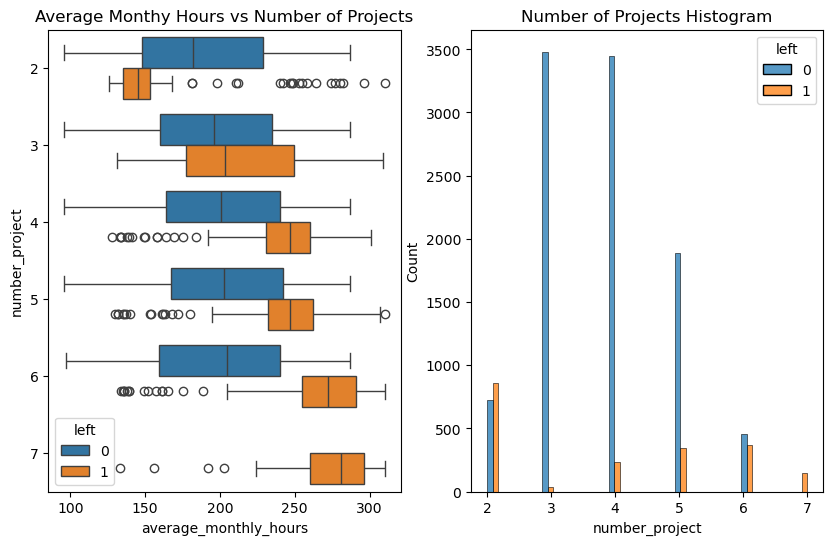

In [111]:
# Create a plot as needed
### YOUR CODE HERE ###
fig,ax = plt.subplots(1,2,figsize  = (10,6))
sns.boxplot(data = df1,x = 'average_monthly_hours',y = 'number_project',hue = 'left',orient = 'h',ax= ax[0])
ax[0].set_title("Average Monthy Hours vs Number of Projects")
sns.histplot(data = df1,x = 'number_project',hue = 'left',multiple = 'dodge',ax =ax[1])
ax[1].set_title("Number of Projects Histogram")

From the above plots, we find that those who left the company worked on fewer projects or more number of projects than average.Also,it looks like every employee who worked on 7 projects left the company.Further analysis can be done to verify this.

In [112]:
# Create a plot as needed
### YOUR CODE HERE ###
df1[df1['number_project']==7]['left'].value_counts()

left
1    145
Name: count, dtype: int64

<Axes: xlabel='salary', ylabel='Count'>

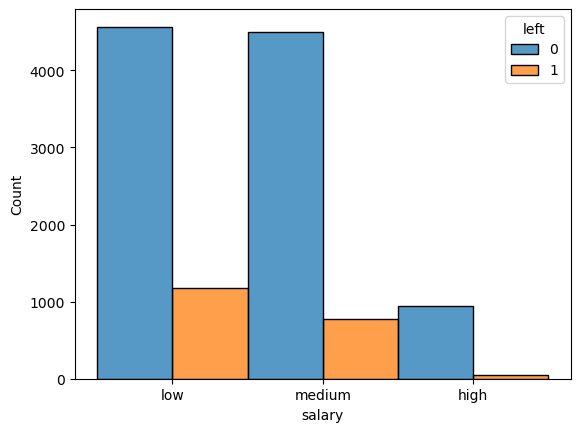

In [113]:
sns.histplot(data = df1,x = 'salary',hue='left',multiple = 'dodge')

* Majority of the employees who left the company had either low or medium salary.
* Employees with low to average salaries tend to leave the company.

<Axes: xlabel='average_monthly_hours', ylabel='satisfaction_level'>

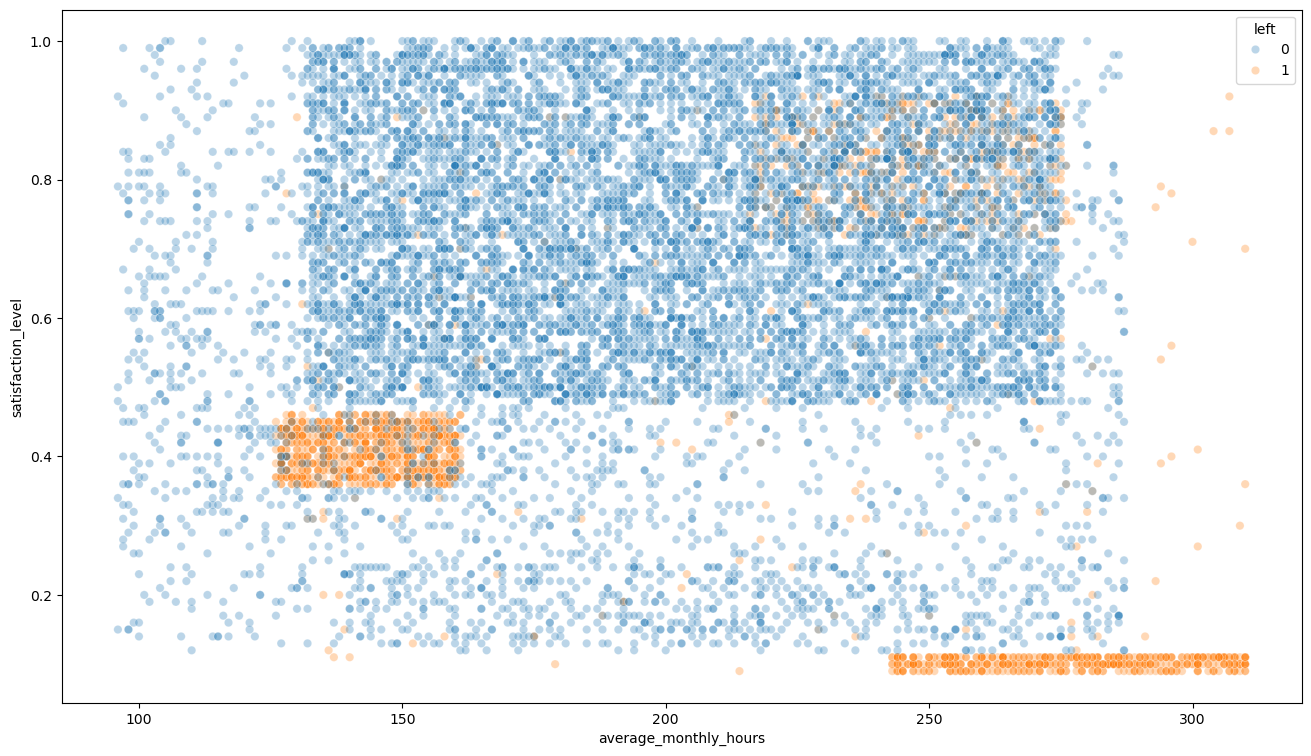

In [114]:
# Create a plot as needed
#xccxx YOUR CODE HERE ###
plt.figure(figsize = (16,9))
sns.scatterplot(data = df1,x='average_monthly_hours',y='satisfaction_level',hue = 'left',alpha = 0.3)


* The scatterplot shows that there was a sizeable group of employees who worked ~240-315 hours per month.315 hours per month is over 75 hours per week for a whole year.it's likely this is related to their satisfaction levels being close to zero.
* The plot also shows another group of people who left, those who had more normal working hours.Even so, their satisfaction level was only around 0.4.It's difficult to speculate why they might have left.
* Also, there is a group of employees who worked ~210.280 hours per month, and they had satisfaction levels ranging from ~0.7 to 0.9.

<Axes: xlabel='tenure', ylabel='Count'>

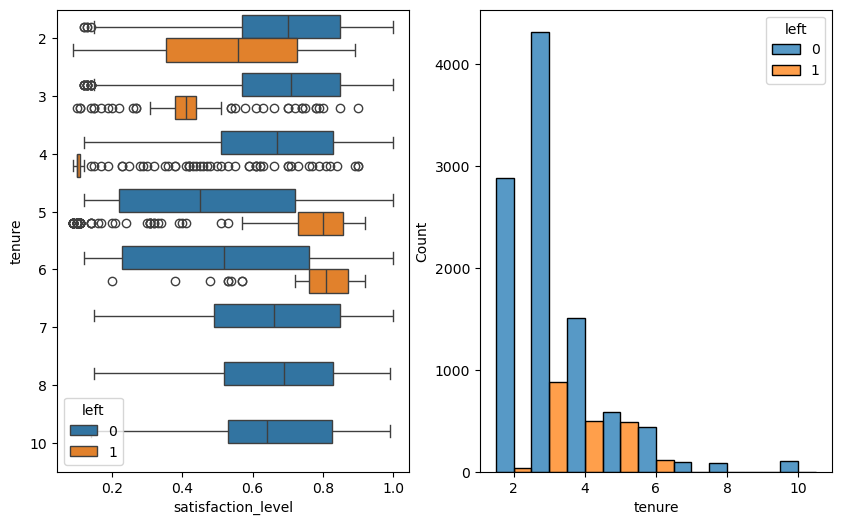

In [115]:
# Create a plot as needed
### YOUR CODE HERE ###
fig,ax = plt.subplots(1,2,figsize = (10,6))
sns.boxplot(data=df1,x='satisfaction_level',y='tenure',hue='left',orient = 'h',ax=ax[0])
sns.histplot(data=df1,x = 'tenure',hue='left',multiple = 'dodge',discrete = 1,ax=ax[1])

* When we analyze satisfaction level and tenure with respect to employees who left, we find that they fall into two general categories: dissatisfied employees with shorter tenures and very satisfied employees with medium-length tenures.
* Four year employees who left had a very low satisfaction level.This finding should be further investigated.
* The longer tenured employees had a good satisfaction level and stayed in the company.

In [116]:
# Create a plot as needed
### YOUR CODE HERE ###
df1.groupby(['left'])['satisfaction_level'].agg(['mean','median'])

,mean,median
left,,
0,0.667365,0.69
1,0.440271,0.41


##### The mean and median values of the satisfaction levels of employees who stayed are greater than those of the employees who left the company.This is as expected.

Text(0.5, 1.0, 'Salary of Long-tenured Employees')

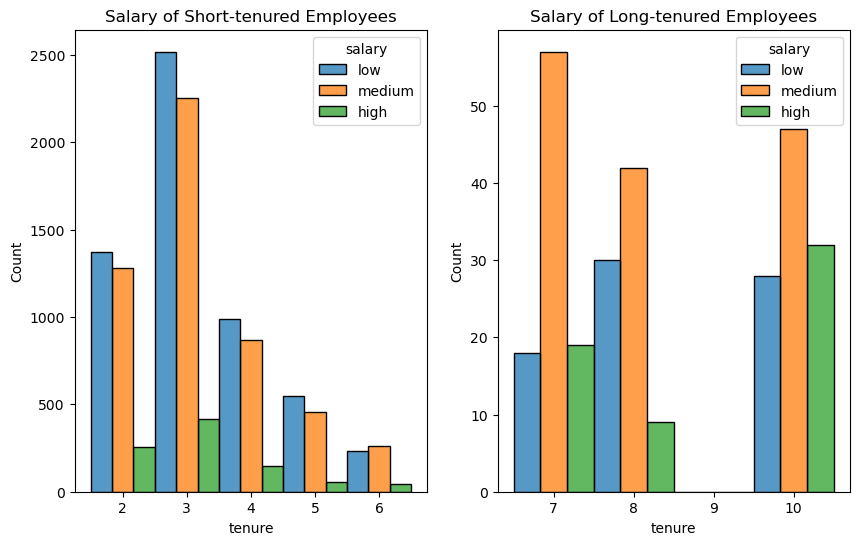

In [117]:
# Create a plot as needed
### YOUR CODE HERE ###
fig,ax = plt.subplots(1,2,figsize = (10,6))
tenure_short = df1[df1['tenure']<7]
sns.histplot(data=tenure_short,x='tenure',hue='salary',multiple='dodge',discrete=1,ax = ax[0])
ax[0].set_title("Salary of Short-tenured Employees")
tenure_long = df1[df1['tenure']>6]
sns.histplot(data = tenure_long,x = 'tenure',hue='salary',hue_order = ['low','medium','high'],multiple = 'dodge',discrete =1,ax = ax[1])
ax[1].set_title("Salary of Long-tenured Employees")

The salary for long and short tenured employees does not seem to have any specific pattern, which indicates that the long-tenured employees were not disproportionately comprised of higher paid employees.

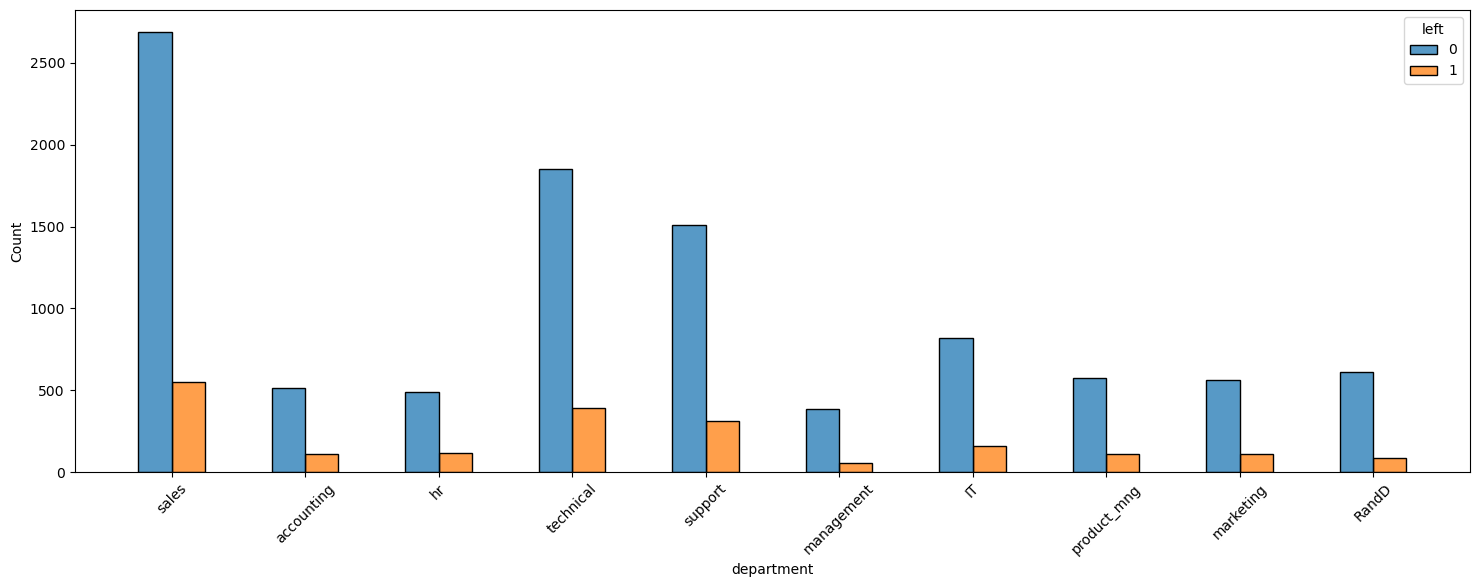

In [118]:
plt.figure(figsize =(18,6))
sns.histplot(data = df1,x = 'department',hue= 'left',multiple = 'dodge',discrete = 1,shrink = 0.5)
plt.xticks(rotation = 45)
plt.show()

The proportion of employees who left the company doesn't seem to follow any specific pattern across various deparments.

<Axes: >

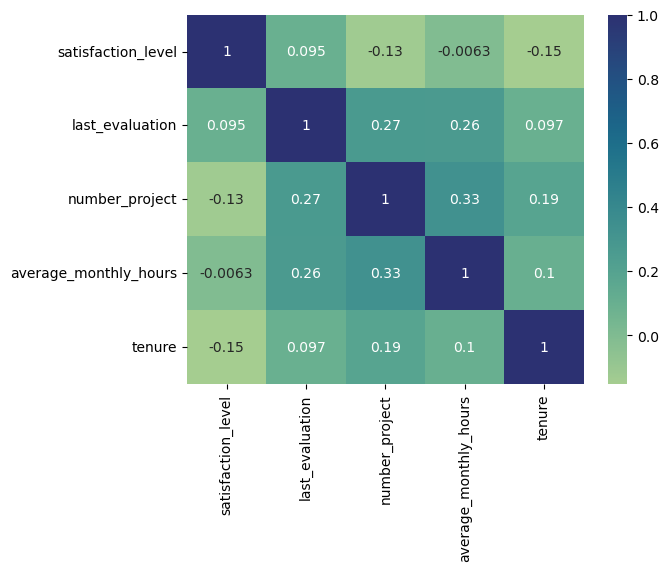

In [119]:
#Creating a heatmap to visualize how correlated variables are
sns.heatmap(df1[['satisfaction_level','last_evaluation','number_project','average_monthly_hours','tenure']].corr(),annot = True,cmap = 'crest')

We can see from the heatmap all the variables' correlation strengths with our predictor variable('left').

## Insights:
It appears that employees are leaving the company as a result of overworking which is potentially caused by poor management. Leaving is tied to longer working hours, many projects, and generally lower satisfaction levels. It can be ungratifying to work long hours and not receive promotions or good evaluation scores. There's a sizeable group of employees at this company who are probably feeling burnt out. It also appears that if an employee has spent more than six years at the company, they tend not to leave.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


## Step 3. Model Building
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions

## Logistic Regression

Logistic regression is a popular and powerful choice for binary classification tasks, especially when interpretability, efficiency, and simplicity are key considerations.


## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





### Identify the type of prediction task.

Our goal is to predict whether an employee leaves the company,which a categorical outcome variable.This involves binary classification.Our outcome variable is either 0(stayed) or 1(left).

In [159]:
df_ready = df1.copy()
df_ready.head(5)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


Now we are at the stage of encoding our non-numeric variables.This inculudes 'department' and 'salary'.We can use dummy encoding for department since its values does not have any hierarchical order.The 'salary' column is ordinal,hence we can convert the levels to numbers.

Since Logistic Regression is sensitive to outliers, we remove the outliers from the tenure column and save it to the dataframe being prepared for modeling.

In [163]:
tenure_iqr = df1['tenure'].quantile(0.75) - df1['tenure'].quantile(0.25)
tenure_upper_limit = df1['tenure'].quantile(0.75) + 1.5 * tenure_iqr
tenure_lower_limit = df1['tenure'].quantile(0.25) - 1.5 * tenure_iqr

# creating a new data frame without the outliers
df_ready = df_ready.loc[(df1['tenure'] < tenure_upper_limit) | (df_ready['tenure'] > tenure_lower_limit)]

df_ready.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,1.0,False,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5,262,6,0,1,0,2.0,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,2.0,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,1.0,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,1.0,False,False,False,False,False,False,False,True,False,False


In [164]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
df_ready['salary']= oe.fit_transform(df_ready[['salary']])
df_ready = pd.get_dummies(df_ready,drop_first = False)
df_ready.reset_index()
df_ready.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,1.0,False,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5,262,6,0,1,0,2.0,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,2.0,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,1.0,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,1.0,False,False,False,False,False,False,False,True,False,False


In [165]:
# Dependent variable
y = df_ready['left']
y.head(10)

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: left, dtype: int64

In [173]:
# Independent variables
X = df_ready.drop(['left'],axis = 1)
X.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,1.0,False,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5,262,6,0,0,2.0,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,0,2.0,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,0,1.0,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,0,1.0,False,False,False,False,False,False,False,True,False,False


Now we split the data into training and testing sets and then fit the data to the model.

In [178]:
#Split the data into training and testing set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,stratify = y,random_state = 42)

In [179]:
log_clf = LogisticRegression(random_state = 42,max_iter = 500).fit(X_train,y_train)

In [180]:
y_pred = log_clf.predict(X_test)

### Creating a Confusion matrix and Classification Report

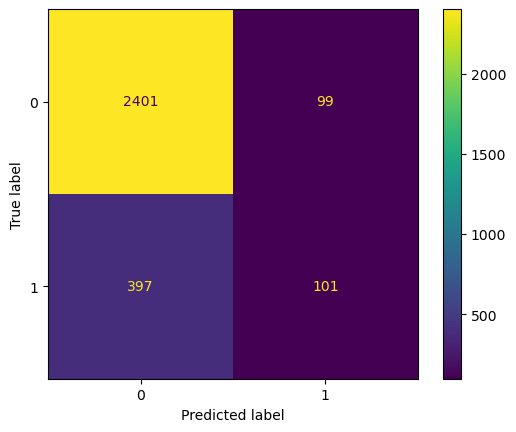

In [181]:
cm = confusion_matrix(y_test,y_pred,labels = log_clf.classes_)
cm_disp = ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = log_clf.classes_)
cm_disp.plot(values_format='')
plt.show()

Logistic regression is a popular and powerful choice for binary classification tasks, especially when interpretability, efficiency, and simplicity are key considerations.

* True negatives : The count of observations that the classifier correctly predicted as False (0). In this case , the classifier correctly predicted the 2401 employees who stayed.

* True positives: The count of observations that the classifier correctly predicted as True (1) i.e. the classifier correctly predicted the 101 employees who left the company.

* False positives: The count of observations that the classifier incorrectly predicted as True (1) i.e. the classifier predicted that 99 employees left who in reality didn't leave.

* False negatives: The count of observations that the classifier incorrectly predicted as False (0). In this case, the classifier predicted that 397 employees didn't leave but in reality they left the company.

In [184]:
df_ready['left'].value_counts(normalize = True)

left
0    0.833959
1    0.166041
Name: proportion, dtype: float64

In [185]:
target_names = ['Predicted would not leave','Predicted would leave']
print(classification_report(y_test,y_pred,target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.96      0.91      2500
    Predicted would leave       0.51      0.20      0.29       498

                 accuracy                           0.83      2998
                macro avg       0.68      0.58      0.60      2998
             weighted avg       0.80      0.83      0.80      2998



In [189]:
# ROC-AUC Score
roc_auc_score(y_test,y_pred)

np.float64(0.5816056224899598)

#### Decision Tree 

A decision tree is used for both classification and regression tasks. It works by recursively splitting the data into subsets based on feature values, aiming to create a model that makes predictions through a series of simple "if-then" rules.

In [131]:
decision_tree = DecisionTreeClassifier(random_state  = 0)
dt_model0 = decision_tree.fit(X_train,y_train)

In [132]:
dt_pred = dt_model0.predict(X_test)

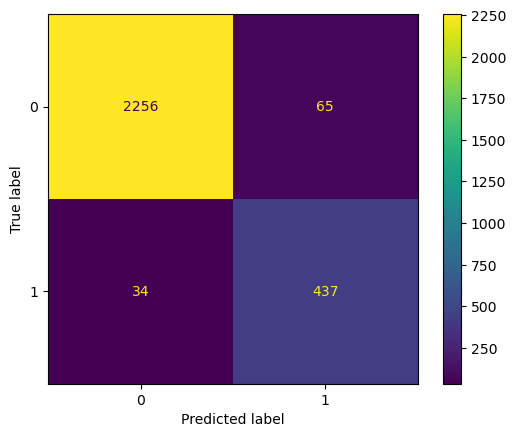

In [133]:
cm1 = confusion_matrix(y_test,dt_pred)
cm_disp1 = ConfusionMatrixDisplay(confusion_matrix = cm1)
cm_disp1.plot()

* True negatives : The count of observations that the classifier correctly predicted as False (0). In this case , the classifier correctly predicted the 2256 employees who stayed.

* True positives: The count of observations that the classifier correctly predicted as True (1) i.e. the classifier correctly predicted the 437 employees who left the company.

* False positives: The count of observations that the classifier incorrectly predicted as True (1) i.e. the classifier predicted that 65 employees left who in reality didn't leave.

* False negatives: The count of observations that the classifier incorrectly predicted as False (0). In this case, the classifier predicted that 34 employees didn't leave but in reality they left the company.

In [134]:
target_names = ['Predicted would not leave','Predicted would leave']
print(classification_report(y_test,dt_pred,target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.99      0.97      0.98      2321
    Predicted would leave       0.87      0.93      0.90       471

                 accuracy                           0.96      2792
                macro avg       0.93      0.95      0.94      2792
             weighted avg       0.97      0.96      0.96      2792



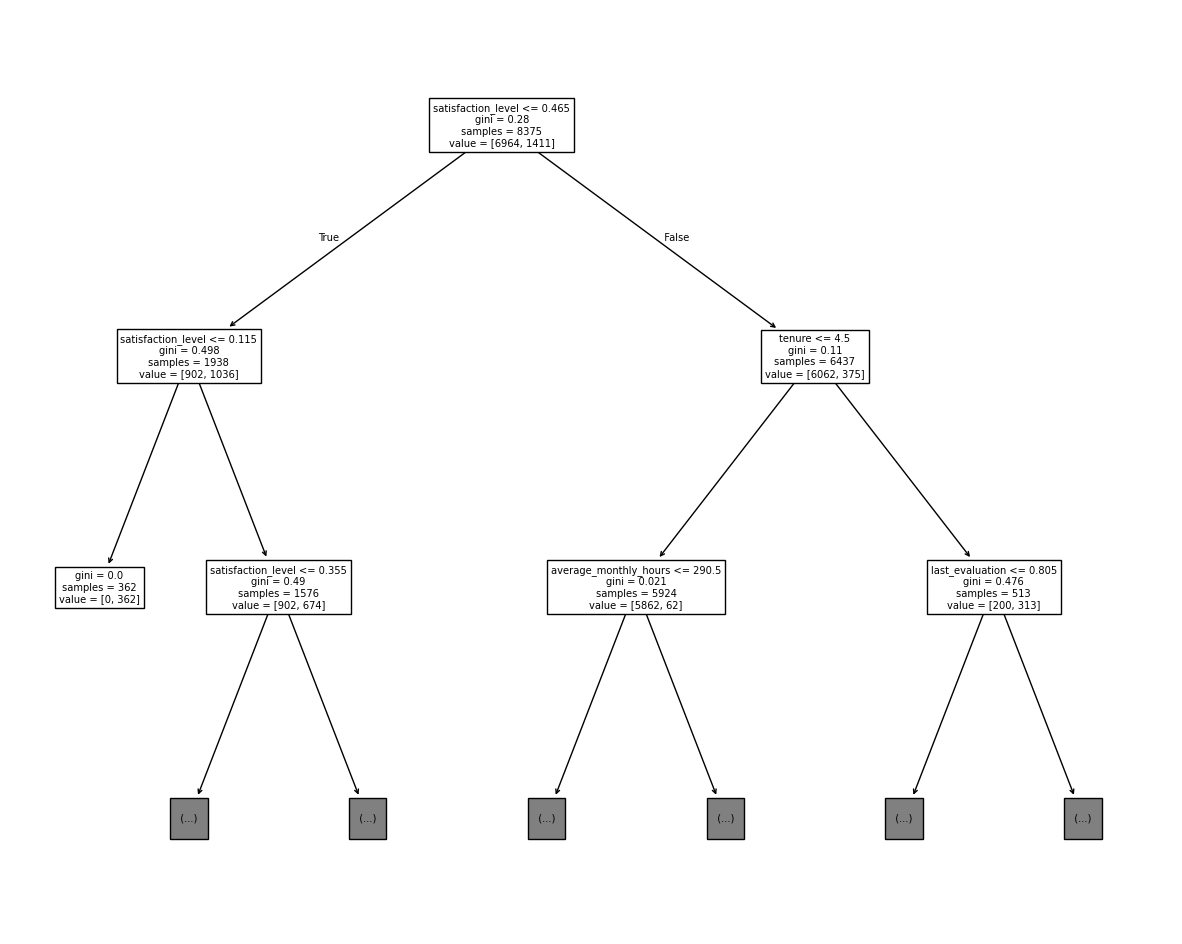

In [135]:
plt.figure(figsize =(15,12))
plot_tree(decision_tree,max_depth = 2,feature_names = X.columns)
plt.show()

### XGBoost

Xtreme Gradient Boosting is a highly efficient and scalable machine learning algorithm based on gradient boosting.It builds an ensemble of decision trees sequentially, where each new tree corrects the errors of the previous ones.

In [136]:
%%time
xgb_clf = XGBClassifier(objective = 'binary:logistic',random_state = 0)
xgb_clf.fit(X_train,y_train)
if hasattr(xgb_clf, "feature_importances_"):
    print("Model is fitted")

Model is fitted
CPU times: user 637 ms, sys: 28.4 ms, total: 666 ms
Wall time: 113 ms


In [137]:
xgb_pred = xgb_clf.predict(X_test)

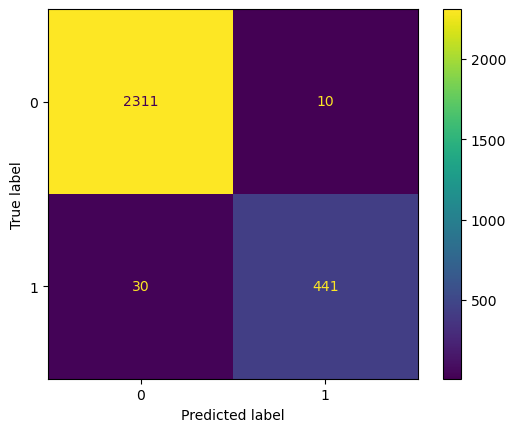

In [138]:
cm2 = confusion_matrix(y_test,xgb_pred)
cm_disp2 = ConfusionMatrixDisplay(confusion_matrix = cm2)
cm_disp2.plot()

True negatives : The count of observations that the classifier correctly predicted as False (0). In this case , the classifier correctly predicted the 2311 employees who stayed.

True positives: The count of observations that the classifier correctly predicted as True (1) i.e. the classifier correctly predicted the 441 employees who left the company.

False positives: The count of observations that the classifier incorrectly predicted as True (1) i.e. the classifier predicted that 10 employees left who in reality didn't leave.

False negatives: The count of observations that the classifier incorrectly predicted as False (0). In this case, the classifier predicted that 30 employees didn't leave but in reality they left the company.

In [139]:
target_names = ['Predicted would not leave','Predicted would leave']
print(classification_report(y_test,xgb_pred,target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.99      1.00      0.99      2321
    Predicted would leave       0.98      0.94      0.96       471

                 accuracy                           0.99      2792
                macro avg       0.98      0.97      0.97      2792
             weighted avg       0.99      0.99      0.99      2792



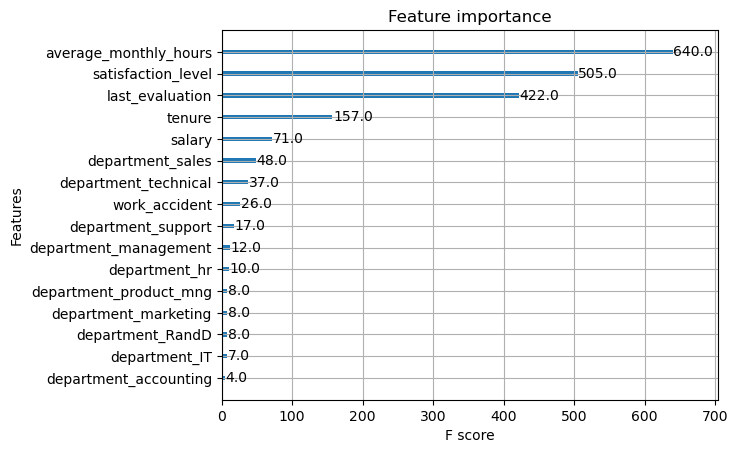

In [140]:
from xgboost import plot_importance
plot_importance(xgb_clf)
plt.show()


## Evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






# PacE: Execute Stage

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

**Logistic Regression**

* The model demonstrates strong performance in predicting employees who remain with a precision of 0.86 and a recall of 0.96, indicating it can accurately identify non-churn cases.
* However ,the model shows limited effectiveness in detecting the people who will leave.The recall for "would leave" class is only 0.20,meaning it fails to capture the majority of employees who actually leave.
* The F1-Score of 0.29 for the churn class reflects poor balance between precision and recall, highlighting the model's difficulty in handling the minority class.
* While the overall accuracy is 83%, this metric is misleading due to class imbalance,the model favors predicting retention over churn.
* These results suggest that this approach may not be suitable for practical churn prediction, where correctly identifying at-risk employees is critical.




**Decision Tree**

* The Decision Tree model achieved an overall accuracy of 96%, indicating a strong ability to generalize across both classes.
* For the "would not leave" class, the model performed exceptionally well with a precision of 0.99 and a recall of 0.97, showing it rarely misclassifies retained employees.
* Moreover, the model also demonstrates robust performance in detecting churners, with a recall of 0.93 and an F1-score of 0.90 for the "would leave" class. This suggests it is highly effective in identifying at-risk employees.
* The balanced precision, recall, and F1-scores across both classes indicate that the Decision Tree effectively manages the class imbalance present in the dataset.
* Overall, this model provides a reliable foundation for churn prediction and can be considered a strong candidate for deployment in a real-world HR analytics context.


**XGBoost**

* The XGBoost model achieved an overall accuracy of 99%, demonstrating exceptional predictive performance.
* For the "would not leave" class, the model reached a precision of 0.99 and a recall of 1.00, indicating near-perfect identification of retained employees with virtually no false positives.
* The model also performs extremely well in detecting churners, with a precision of 0.98, recall of 0.94, and F1-score of 0.96, showing a strong balance between identifying at-risk employees and minimizing false alarms.
* The consistently high scores across all metrics suggest that XGBoost effectively handles the class imbalance and captures complex relationships within the dataset.
* Overall, this model provides the strongest performance among the tested approaches and represents the most suitable candidate for deployment in an employee churn prediction setting.


### Conclusion

* Among the three models evaluated, XGBoost demonstrated the highest overall performance with an accuracy of 99%, F1-score of 0.96–0.99, and strong precision and recall for both classes, making it highly effective in predicting both employees who would leave and those who would stay.
* Decision Tree also performed very well with 96% accuracy and balanced precision and recall, but slightly underperformed compared to XGBoost, particularly in identifying employees likely to leave.
* Logistic Regression showed moderate performance with 83% accuracy, performing well for predicting employees who would stay but poorly for predicting those who would leave (recall 0.20), indicating susceptibility to class imbalance.


### Recommendations
* **Focus on High-Risk Employees**:
Use the predictions from the XGBoost model to identify employees most likely to leave and prioritize engagement strategies such as feedback sessions, mentorship, or career development opportunities.

* **Enhance Retention Programs**:
Since the model highlights key churn drivers, HR can design targeted retention initiatives—for example, improving work-life balance, recognition programs, or training opportunities for teams with higher turnover risk.


* **Monitor Workforce Trends**:
Regularly track model insights to detect patterns in employee behavior, enabling proactive interventions before churn occurs.


* **Data-Driven Decision Making**:
Incorporate predictive analytics into HR processes such as performance reviews, promotions, and succession planning, ensuring decisions are informed by both historical data and model predictions.

* **Continuous Feedback Loop**:
Gather feedback from employees and compare with model predictions to refine strategies, improve prediction accuracy over time, and ensure HR initiatives are effective.

* **Prioritize Employee Engagement for Retention**:
Focus on high-impact areas identified by feature importance analysis (e.g., job satisfaction, career growth, compensation) to reduce voluntary turnover.